In [1]:
#amir hossein babaeayan 401131002

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#A

In [58]:
import cv2
import numpy as np
import glob
import os

IMG_SIZE = (128, 128)

fire_images = []
for img_path in glob.glob("/content/drive/MyDrive/_datasets/fire_dataset/fire_images/*.png"):
    img = cv2.imread(img_path)
    img = cv2.resize(img, IMG_SIZE)
    img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    fire_images.append(img)

non_fire_images = []
for img_path in glob.glob("/content/drive/MyDrive/_datasets/fire_dataset/non_fire_images/*.png"):
    img = cv2.imread(img_path)
    img = cv2.resize(img, IMG_SIZE)
    img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    non_fire_images.append(img)

X = np.array(fire_images + non_fire_images)
y = np.array([1]*len(fire_images) + [0]*len(non_fire_images))


#B

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


#C

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train.reshape(len(X_train), -1), y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

#D

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test.reshape(len(X_test), -1))

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 91.67%
Confusion Matrix:
[[ 43  16]
 [  5 188]]


#E

In [34]:
from sklearn.metrics import f1_score

probs = model.predict_proba(X_train.reshape(len(X_train), -1))[:, 1]

thresholds = np.arange(0, 1, 0.25)

f1_scores = []
for t in thresholds:
    y_pred = (probs >= t).astype(int)
    f1_scores.append(f1_score(y_train, y_pred))

best_threshold = thresholds[np.argmax(f1_scores)]
print("Best Threshold:", best_threshold)

y_pred = (model.predict_proba(X_test.reshape(len(X_test), -1))[:, 1] >= best_threshold).astype(int)
print("Accuracy with Best Threshold: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))
print("Confusion Matrix with Best Threshold:")
print(confusion_matrix(y_test, y_pred))


Best Threshold: 0.25
Accuracy with Best Threshold: 92.06%
Confusion Matrix with Best Threshold:
[[ 42  17]
 [  3 190]]


#F

In [35]:
import pickle

with open("best_model.pkl", "wb") as f:
    pickle.dump((model, best_threshold), f)

with open("best_model.pkl", "rb") as f:
    model, best_threshold = pickle.load(f)


In [54]:
test_images = []
test_images_org = []
for img_path in glob.glob("/content/drive/MyDrive/_datasets/fire_dataset/test/*.png"):
    img = cv2.imread(img_path)
    test_images_org.append(img)
    img = cv2.resize(img, IMG_SIZE)
    img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    test_images.append(img)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

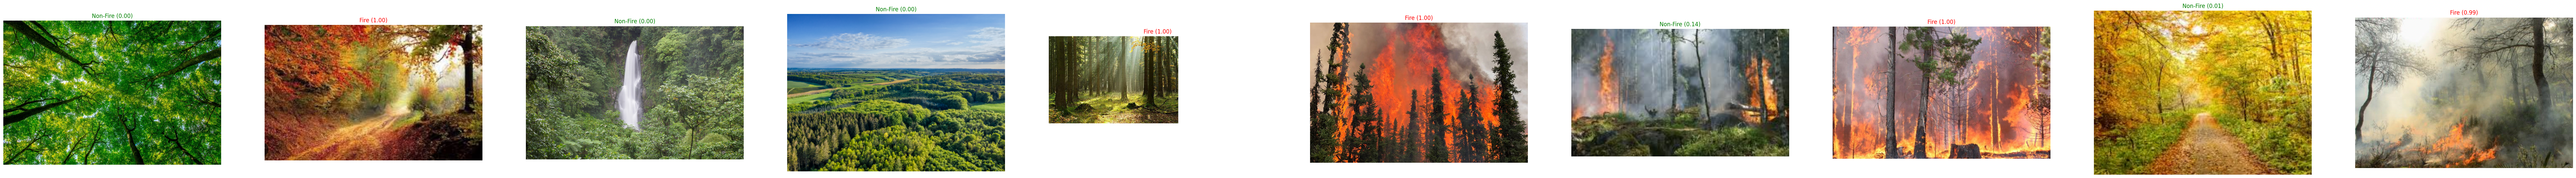

In [57]:
from PIL import Image
import matplotlib.pyplot as plt


def predict(img):
    prob = model.predict_proba(img.reshape(1, -1))[0][1]
    label = "Fire" if prob >= best_threshold else "Non-Fire"
    color = "red" if label == "Fire" else "green"
    return label, prob, color

label = [0]*len(test_images)
color = [0]*len(test_images)
prob  = [0]*len(test_images)
for i in range(len(test_images)):
  label[i], prob[i], color[i] = predict(test_images[i].reshape(1, -1))



fig, axs = plt.subplots(1, 10, figsize=(100, 20))
for i in range(len(test_images)):
  axs[i].imshow(cv2.cvtColor(test_images_org[i], cv2.COLOR_BGR2RGB))
  axs[i].set_title(f"{label[i]} ({prob[i]:.2f})", color=color[i])
  axs[i].axis("off")


plt.show()


In [46]:
prob[1]

'red'